# 项目综合实战——上海地区租房信息分析

# 一、读取数据

## 1.1 获取数据

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series

#### *租房数据是由Scrapy框架构建的爬虫获取网页数据得到

In [58]:
data=pd.read_csv('zufang/zufang/house_rent_info.csv')
data.head()

,address,apartment,area,elevator,floor,house_name,orientation,price,rent,subway_line,title
0,静安-永和 汶水路649弄,3室1厅,21平米,有电梯,低层(共88层),永和一村,西南,2430 元/月,合租,7号线,精装温馨舒适 采光良好 干净舒适 拎包入住 看房方便
1,静安-曹家渡 延平路237弄,3室1厅,26平米,有电梯,低层(共14层),延平路237弄小区,朝西,2060 元/月,合租,无,延平路237弄小区 精装大主卧押一付一家电齐全随时看房
2,"黄浦-复兴公园 陕西南路151-185号(单),陕西南路187弄1-87号",1室2厅,120平米,无电梯,共3层,陕南邨,南北,10000 元/月,整租,1/10/12号线,复兴中路陕西南路老洋房一楼带花园适合美容美甲茶室皮肤管理等等
3,浦东-碧云 明月路888弄,6室3厅,680平米,有电梯,共3层,碧云别墅(南区),朝南,65000 元/月,整租,9号线,内环品 牌小区 豪华装修 业主急租 可考虑办公 随时看房
4,浦东-金杨 德平路100弄,2室1厅,65平米,无电梯,中层(共6层),罗山六村,朝南,5000 元/月,整租,6号线,可押一付一！6号线德平站！罗山六村！精装全明全配！随时看房！


## 1.2 查看数据

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 11 columns):
address        3120 non-null object
apartment      3120 non-null object
area           3120 non-null object
elevator       3120 non-null object
floor          3120 non-null object
house_name     3120 non-null object
orientation    3120 non-null object
price          3120 non-null object
rent           3120 non-null object
subway_line    3120 non-null object
title          3120 non-null object
dtypes: object(11)
memory usage: 268.2+ KB


## 1.3 数据查重

In [60]:
data.duplicated().value_counts()

False    2170
True      950
dtype: int64

## 1.4 清除重复项

In [61]:
data.drop_duplicates(keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 3119
Data columns (total 11 columns):
address        2170 non-null object
apartment      2170 non-null object
area           2170 non-null object
elevator       2170 non-null object
floor          2170 non-null object
house_name     2170 non-null object
orientation    2170 non-null object
price          2170 non-null object
rent           2170 non-null object
subway_line    2170 non-null object
title          2170 non-null object
dtypes: object(11)
memory usage: 203.4+ KB


#### 租房信息共 2170 条，列索引分别为：地址、户型、面积、电梯、楼层、小区名称、房屋朝向、价格、出租类型、附近地铁、出租标题

# 二、数据清洗

## 2.1 对地址 address* 列进行处理：分解地址，获取区域名称

### 2.1.1 查看数据

In [62]:
data.address=data.address.str.split('-').str[0]

In [63]:
data.address.value_counts()

浦东      392
宝山      221
普陀      205
松江      204
静安      196
虹口      192
闵行      151
嘉定      135
黄浦      129
徐汇       89
杨浦       89
长宁       83
青浦       57
上海周边     18
          5
奉贤        3
金山        1
Name: address, dtype: int64

#### 可以看出，有 5 条信息是没有区域信息，由于其数据量小，将这 5 条数据删除

### 2.1.2 删除空值所在行

In [64]:
data[(data.address=='')].index.tolist()

[60, 764, 1815, 2243, 3041]

In [65]:
data=data.drop([60, 764, 1815, 2243, 3041])

In [66]:
data.address.value_counts()

浦东      392
宝山      221
普陀      205
松江      204
静安      196
虹口      192
闵行      151
嘉定      135
黄浦      129
徐汇       89
杨浦       89
长宁       83
青浦       57
上海周边     18
奉贤        3
金山        1
Name: address, dtype: int64

#### OK! 删除掉了

## 2.2 对房屋户型 apartment* 进行处理：获取卧室数量

### 2.2.1 查看数据

In [67]:
data.apartment.value_counts().head()

3室1厅    1101
4室1厅     341
2室1厅     340
3室2厅     117
2室2厅     107
Name: apartment, dtype: int64

### 2.2.2 拆分字段，新建一列 bed_room_counts* 赋予卧室数量

In [68]:
data['bed_room_counts']=data.apartment.str.split('室').str[0]
data['bed_room_counts'].value_counts()

3    1219
2     450
4     375
1      96
5      18
6       5
8       2
Name: bed_room_counts, dtype: int64

### 2.2.3 转换字符类型

In [69]:
data['bed_room_counts']=data['bed_room_counts'].astype(int)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 3119
Data columns (total 12 columns):
address            2165 non-null object
apartment          2165 non-null object
area               2165 non-null object
elevator           2165 non-null object
floor              2165 non-null object
house_name         2165 non-null object
orientation        2165 non-null object
price              2165 non-null object
rent               2165 non-null object
subway_line        2165 non-null object
title              2165 non-null object
bed_room_counts    2165 non-null int64
dtypes: int64(1), object(11)
memory usage: 219.9+ KB


## 2.3 对室内面积 area* 列进行处理：转换为数值类型

### 2.3.1 查看是数据

In [71]:
data.area.head()

0     21平米
1     26平米
2    120平米
3    680平米
4     65平米
Name: area, dtype: object

### 2.3.2 拆分出数值字段，并覆盖原来的列

In [72]:
data['area']=data['area'].str.split('平').str[0]

In [73]:
data.area.head()

0     21
1     26
2    120
3    680
4     65
Name: area, dtype: object

### 2.3.3 转换字符类型

In [74]:
data['area']=data['area'].astype(int)

In [75]:
data.area.head()

0     21
1     26
2    120
3    680
4     65
Name: area, dtype: int64

## 2.4 对楼层 floor* 列进行处理：统一单位属性

### 2.4.1 查看数据

In [76]:
a_1=data.floor.value_counts()
a_1.head()

中层(共13层)    129
低层(共18层)    105
中层(共18层)    102
中层(共14层)     90
中层(共12层)     87
Name: floor, dtype: int64

#### 可以看出，有的楼层并没有标注是高层还是低层

### 2.4.2 找出未标注楼层高低的数据，并添加楼层高低标注

In [77]:
for i in a_1.index:
    if len(str(i))<7:
        print(i)

共3层
共2层
共4层
共5层
共1层


#### *可以看出，有 5 条数据未标注，而且这些楼层均为低层

In [78]:
for i in data['floor']:
    if len(i)<7:
        data.loc[data['floor']==i,'floor']='低层('+i+')'
data.floor.value_counts().head()

中层(共13层)    129
低层(共18层)    105
中层(共18层)    102
中层(共14层)     90
中层(共12层)     87
Name: floor, dtype: int64

### 2.4.2 分离出楼层属性，并新建两列，存储楼层高低和总楼层数

In [79]:
data['high_or_low']=data['floor'].str.split('(').str[0]
data.high_or_low.value_counts()

中层    1036
低层     887
高层     242
Name: high_or_low, dtype: int64

In [80]:
data['building_height']=data['floor'].str.split('共').str[1].str.split('层').str[0]
data.building_height.head()

0    88
1    14
2     3
3     3
4     6
Name: building_height, dtype: object

#### 检查拆分后有无空值 

In [81]:
data.building_height.isnull().value_counts()

False    2165
Name: building_height, dtype: int64

#### *没有空值

### 2.4.3 转换数据类型

In [82]:
data['building_height']=data['building_height'].astype(int)

## 2.4 对房屋朝向 orientation* 列进行处理

### 2.4.1 查看数据

In [83]:
data.orientation.value_counts()

朝南    725
东南    617
朝西    318
南北    170
朝东    168
西南    142
朝北     19
东北      4
西北      2
Name: orientation, dtype: int64

### 2.4.2 将【朝北】并入【南北】分类

In [84]:
for i in data['orientation']:
    if i=='朝北':
        data.loc[data['orientation']=='朝北','orientation']='南北'

In [85]:
data.orientation.value_counts()

朝南    725
东南    617
朝西    318
南北    189
朝东    168
西南    142
东北      4
西北      2
Name: orientation, dtype: int64

## 2.4 对租金 price* 列进行处理

### 2.4.1 查看数据

In [86]:
data.price.head()

0     2430 元/月
1     2060 元/月
2    10000 元/月
3    65000 元/月
4     5000 元/月
Name: price, dtype: object

### 2.4.2 取出数值字段，并覆盖原来的租金列

In [87]:
new_price=data['price'].str.split(' ').str[0]
new_price.describe()

count     2165
unique     326
top       1800
freq        40
Name: price, dtype: object

#### * 提取完成，没有空值

In [88]:
data['price']=new_price.astype(int)

In [89]:
data.price.head()

0     2430
1     2060
2    10000
3    65000
4     5000
Name: price, dtype: int64

## 2.5 对附近地铁线 subway_line* 列进行处理

### 2.5.1 查看数据

In [90]:
data.subway_line.head(15)

0           7号线
1             无
2     1/10/12号线
3           9号线
4           6号线
5           9号线
6        7/13号线
7         1/5号线
8             无
9          11号线
10    2/10/12号线
11         浦江号线
12            无
13          6号线
14          9号线
Name: subway_line, dtype: object

### 2.5.2 拆分目标字段

In [91]:
sub=data.subway_line.str.split('号').str[0]
sub.head(30)

0           7
1           无
2     1/10/12
3           9
4           6
5           9
6        7/13
7         1/5
8           无
9          11
10    2/10/12
11         浦江
12          无
13          6
14          9
15       9/13
16          无
17          无
18       4/10
19         17
20          无
21          1
22          无
23       8/12
24       6/11
25          无
26         11
27          8
28    5南延伸段/5
29          9
Name: subway_line, dtype: object

### 2.5.3 转置Series

In [92]:
sub_count=sub.str.split('/').apply(Series).unstack().reset_index()
sub_count.head()

,level_0,level_1,0
0,0,0,7
1,0,1,无
2,0,2,1
3,0,3,9
4,0,4,6


### 2.5.4 设置列索引，并删除多余的 level_0* 列

In [93]:
sub_count.columns=['level_0','level_1','line']

In [94]:
sub_count.head()

,level_0,level_1,line
0,0,0,7
1,0,1,无
2,0,2,1
3,0,3,9
4,0,4,6


In [95]:
sub_count.drop('level_0',axis=1).head()

,level_1,line
0,0,7
1,1,无
2,2,1
3,3,9
4,4,6


### 2.5.5 按地铁线对房源数量求和

In [96]:
sub_counts=sub_count.line.value_counts().reset_index()
sub_counts.columns=['sub_line','counts']
sub_counts.head()

,sub_line,counts
0,无,553
1,11,241
2,1,235
3,10,227
4,9,221


# 三、数据分析

## 3.1 整体数值型数据分析

In [97]:
data.describe()

,area,price,bed_room_counts,building_height
count,2165.000000,2165.000000,2165.000000,2165.000000
mean,34.017090,3277.306236,2.904850,17.927483
std,51.267251,6802.225424,0.791708,12.686822
min,10.000000,514.000000,1.000000,1.000000
25%,15.000000,1450.000000,2.000000,12.000000
50%,19.000000,1820.000000,3.000000,16.000000
75%,23.000000,2300.000000,3.000000,20.000000
max,680.000000,150000.000000,8.000000,93.000000


*** 结果分析 ***
- 住房面积最小为 10m² ，最大为 680m²
- 上海租房价格平均值为 3277.3 元/月，而最便宜的为 514 元/月
- 房屋结构最多的为 8 居室，平均为 3 居室
- 最高楼层高度为 93 层，平均为 18 层

## 3.2 各区房源数量

In [98]:
from pyecharts import Bar
bar = Bar('各区房源数量柱状图图')
bar.add('房源数量',
        data.address.value_counts().index,
        data.address.value_counts().values,
        is_more_utils = True    #设置最右侧工具栏
        )
bar

*** 结果分析 ***
- 浦东新区的房源数量最多，是排名第二宝山区的两倍左右
- 可以发现排名前四的地区都离市区较远，这些地方租房可能不利于每天的通勤

## 3.3 房源房屋结构

### 3.3.1 结构类型

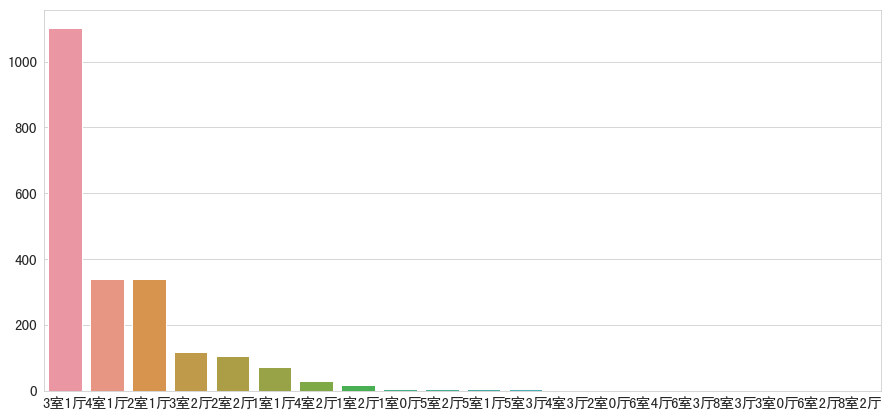

In [99]:
import seaborn as sns
s=data['apartment'].value_counts()
sns.barplot(x=s.index, y=s.values)

### 3.3.2 住房面积

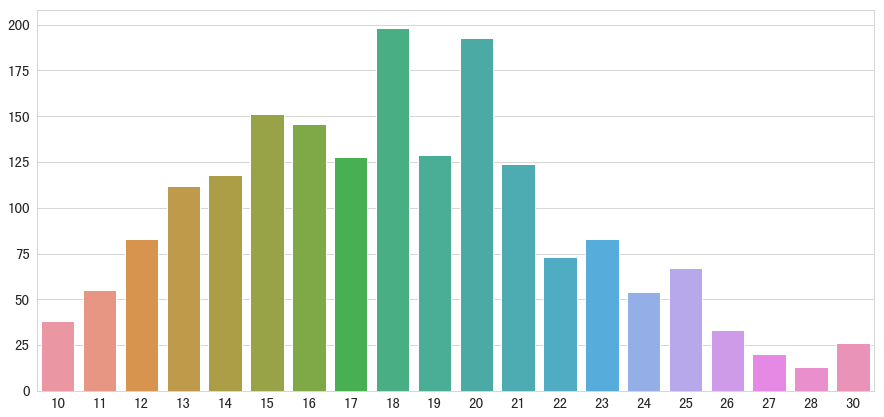

In [100]:
s=data['area'].value_counts()[:20]
sns.barplot(x=s.index, y=s.values)

*** 结果分析 ***
- 可以看出3室1厅的房型最多，是4室1厅和2室1厅的三倍左右，有超过 1000 处房源
- 住房面积集中在 15-21 m²之间

## 3.4 合租 or 整租

In [101]:
data.rent.value_counts().reset_index()

,index,rent
0,合租,1852
1,整租,313


In [102]:
h_z=data[['rent','price']]
h_z=h_z.groupby('rent').mean()
h_z

,price
rent,
合租,1767.756479
整租,12209.210863


*** 结果分析 ***
- 合租与整租房源数量有巨大差异，合租是整租房源数的 6 倍左右
- 从价格方面看，合租比整租便宜很多，合租的平均房租为 1767.75 元/月

## 3.5 房源与附近地铁线分析

###  3.5.1 绘制饼图

In [103]:
from pyecharts import Pie
attr=sub_counts.sub_line.tolist()
v1=sub_counts.counts.tolist()
pie=Pie('各地铁线附近房源占比',title_pos='right')
pie.add('',attr,v1,is_label_show=True,legend_orient='vertical',legend_pos='left')
pie

###  3.5.2 绘制条形图

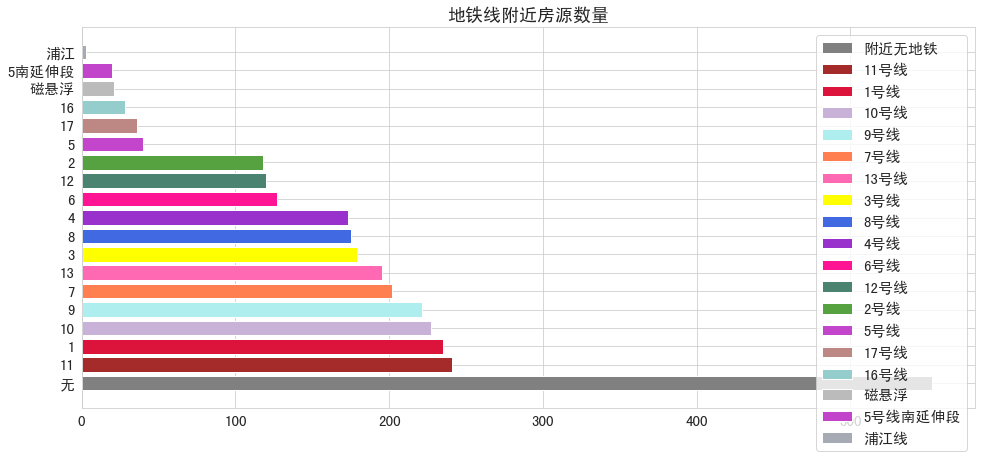

In [104]:
plt.rcParams['figure.figsize'] = (16.0, 7.0)
plt.barh(sub_counts.sub_line[0],sub_counts.counts[0],label='附近无地铁',color='#808080')
plt.barh(sub_counts.sub_line[1],sub_counts.counts[1],label='11号线',color='#A52A2A')
plt.barh(sub_counts.sub_line[2],sub_counts.counts[2],label='1号线',color='#DC143C')
plt.barh(sub_counts.sub_line[3],sub_counts.counts[3],label='10号线',color='#C9B2D7')
plt.barh(sub_counts.sub_line[4],sub_counts.counts[4],label='9号线',color='#AFEEEE')
plt.barh(sub_counts.sub_line[5],sub_counts.counts[5],label='7号线',color='#FF7F50')
plt.barh(sub_counts.sub_line[6],sub_counts.counts[6],label='13号线',color='#FF69B4')
plt.barh(sub_counts.sub_line[7],sub_counts.counts[7],label='3号线',color='#FFFF00')
plt.barh(sub_counts.sub_line[8],sub_counts.counts[8],label='8号线',color='#4169E1')
plt.barh(sub_counts.sub_line[9],sub_counts.counts[9],label='4号线',color='#9932CC')
plt.barh(sub_counts.sub_line[10],sub_counts.counts[10],label='6号线',color='#FF1493')
plt.barh(sub_counts.sub_line[11],sub_counts.counts[11],label='12号线',color='#4A8470')
plt.barh(sub_counts.sub_line[12],sub_counts.counts[12],label='2号线',color='#56A140')
plt.barh(sub_counts.sub_line[13],sub_counts.counts[13],label='5号线',color='#C245CB')
plt.barh(sub_counts.sub_line[14],sub_counts.counts[14],label='17号线',color='#BD8884')
plt.barh(sub_counts.sub_line[15],sub_counts.counts[15],label='16号线',color='#95CCCC')
plt.barh(sub_counts.sub_line[16],sub_counts.counts[16],label='磁悬浮',color='#BBBBBB')
plt.barh(sub_counts.sub_line[17],sub_counts.counts[17],label='5号线南延伸段',color='#C144CA')
plt.barh(sub_counts.sub_line[18],sub_counts.counts[18],label='浦江线',color='#A6AAB4')
plt.legend()
plt.title('地铁线附近房源数量')
plt.show()

*** 结果分析 ***
- 从占比情况来看，房源位于非地铁线附近占比最多为 18.98% ，且超过 500 个房源，而位于地铁线附近房源占比分布较为均匀
- 11号线、1号线、10号线和9号线房源数量排名靠前，都超过 200 个房源

## 3.6 房源楼层分析

### 3.6.1 所在楼层分析

In [105]:
high_low_counts=data.high_or_low.value_counts().reset_index()
high_low_counts.columns=['high_or_low','counts']

In [106]:
from pyecharts import Pie

attr = high_low_counts.high_or_low.tolist()
v1 = high_low_counts.counts.tolist()
pie = Pie("房源所在楼层分布占比", title_pos='center', width=900)
pie.add("", attr, v1, center=[50, 50], is_random=True, radius=[40, 75], rosetype='area',
        is_legend_show=False, is_label_show=True)
 
pie

### 3.6.2 房源楼层高度分析

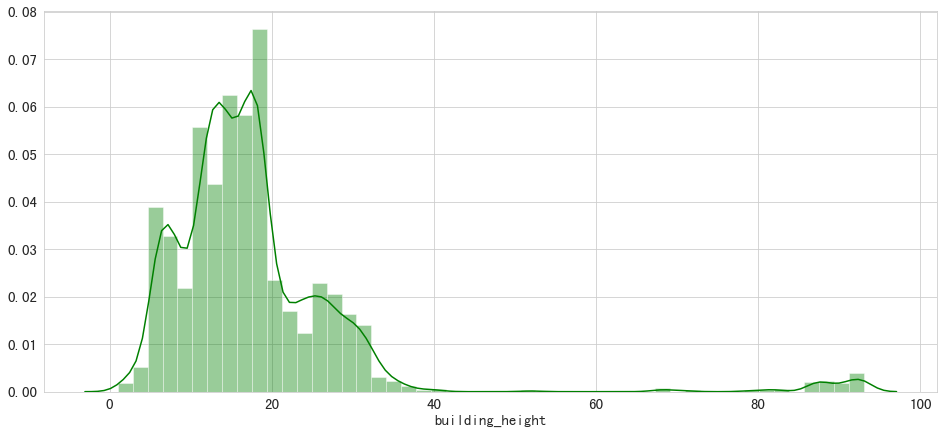

In [107]:
import seaborn as sns
fig=plt.figure(1)
sns.distplot(data.building_height, color="g")
plt.show()

*** 结果分析 ***
- 中层和低层数量最多，且均超过总房源数的 40% 
- 房源楼层高度方面，17-20 层最多，也有少量 90 层高左右的房源

## 3.7 房租价格分析

### 3.7.1 按区域位置分析

In [108]:
a_p=data[['address','price']]
a_p=a_p.groupby('address').mean().sort_values(by='price')

NameError: name 'address_price' is not defined

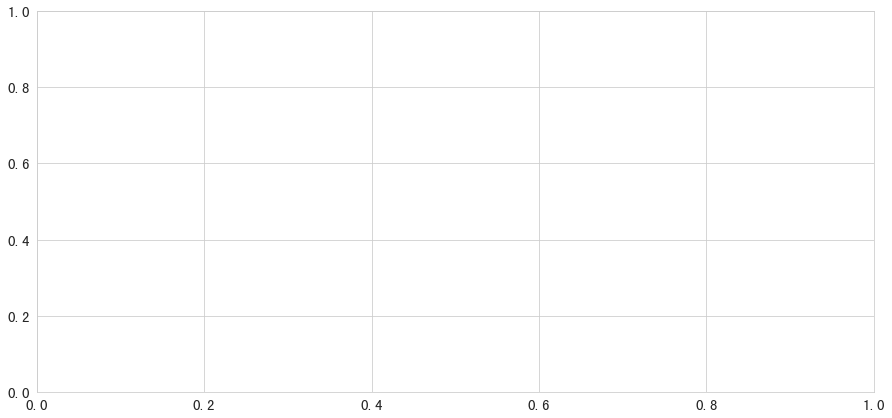

In [109]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (15.0, 7.0)
matplotlib.rcParams['font.family'] = 'SimHei' #配置中文字体
matplotlib.rcParams['font.size'] = 15   # 更改默认字体大小
fig=plt.figure(1)
ax=plt.subplot(111)
width=0.7
datas=address_price.price
x_bar=address_price.index
rect=ax.bar(x_bar,height=datas,width=width,color='lightblue')
for rec in rect:
    x=rec.get_x()
    y=rec.get_height()
    ax.text(x,y+0.5,str(y))
    
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
plt.grid(True)
plt.show()

*** 结果分析 ***
- 上海周边为苏州、杭州一带，租房平均价为 2877.2 元/月
- 较便宜的地区均价在 1200-1800 元/月，但这些地方离市中心较远
- 作为上海的中心区域，黄浦区的租房价接近 8000 元/月

### 3.7.2 按房屋面积分析

In [114]:
a_p=data[['area','price']]
a_p.head()

,area,price
0,21,2430
1,26,2060
2,120,10000
3,680,65000
4,65,5000


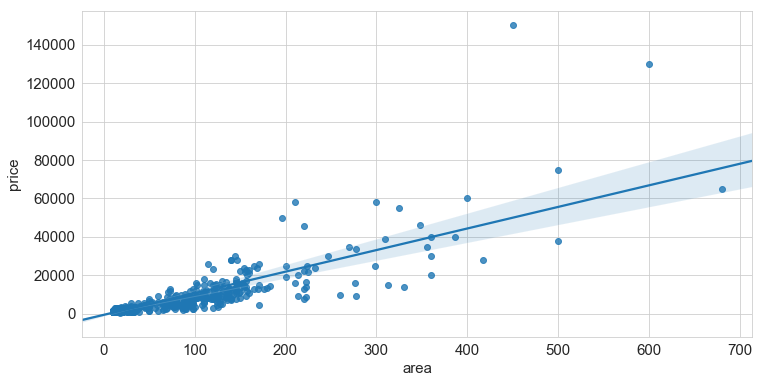

In [115]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.regplot(x='area', y='price', data=a_p)

* 皮尔逊相关性

In [116]:
data['area'].corr(data['price'])

0.8460687456278573

*** 结果分析 ***
- 利用皮尔逊相关系数可看出，住房面积和租金是强相关性
- 可以看出大部分房源在 180 m²以内，而随着房屋面积增加，房租也随之增加
- 在 200~300 m²之间，可以看出租金高达 1.5~2 万左右

### 3.7.3 按房屋朝向分析

In [110]:
orientation_price=data.groupby('orientation')['price'].mean().map(lambda x:'%.2f'%x).apply(pd.to_numeric)
orientation_prices=orientation_price.reset_index().sort_values('orientation')

In [111]:
orientation_count=data.orientation.value_counts()
orientation_counts=orientation_count.reset_index().sort_values('index')

In [112]:
from pyecharts import Bar,Line,Overlap
attr=orientation_prices['orientation']
v1=orientation_prices['price']
v2=orientation_counts['orientation']
bar=Bar('房屋朝向与房屋数量、房租的关系')
bar.add('bar',attr,v1,mark_point=['max'],mark_line=['average'])
line=Line()
line.add('line',attr,v2,mark_point=['max','min'])
overlap=Overlap()
overlap.add(bar)
overlap.add(line)
overlap

*** 结果分析 ***
- 南北朝向的房屋是最贵的，平均房租为 10939.19 元/月
- 以朝南的房屋最多，为 725 个房源，最少的是西北朝向的房屋，只有 2 个房源
- 按房屋朝向分类，上海房租平均价为 3695.14 元/月

# 四、房源标题词云图

In [53]:
key_words=pd.read_csv('key_words.csv')
tup={}
aim_line=data.title
for i in key_words:
    a=0
    for j in aim_line:
        if i in j:
            tup[i]=a
            a+=1      

In [54]:
from pyecharts import WordCloud
wordcloud=WordCloud(width=800,height=500)
wordcloud.add('',tup.keys(),tup.values(),word_size_range=[20,50])
wordcloud

# 五、数据分析结论

- 上海各区租房价格平均值为 3277.3 元/月，对于一般打工族来说，确实是很大一笔支出
- 从地区上来看，浦东、普陀、静安、闵行的房源数多，虽然地理位置随离城中心较远，但其房租相对较低
- 南北朝向的房源最贵，却房源较少；租房可以考虑东南朝向的房源，其房源数量较多，且租金较低为 1684.15 元/月
- 如果租房者在市区中心工作，那么可以优先杨浦区的房源，其离市中心较近，房租也相对较低，为 2578.17 元/月
- 对于每天通勤的租房者来说，地铁线附近房源很充足，假如不喜欢每天挤地铁，也可以选择公司附近避开地铁线的房源，这样选择将会更多
- 从词云图来看，房源大多都是押一付一，支持随时看房